In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from collections import Counter
import re
from sklearn.model_selection import train_test_split

In [ ]:
df_train = pd.read_csv("./train.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Lets learn the different types of data available:

In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Time to Visualize the dataset

Text(0.5, 1.0, 'Ratio of the classes')

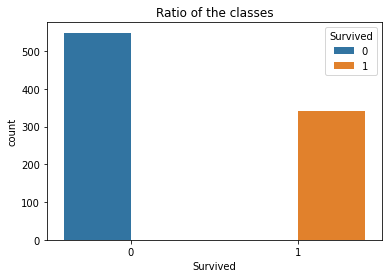

In [ ]:
# Checking the ratio 
sb.countplot(data=df_train,x="Survived",hue="Survived")
plt.title("Ratio of the classes")

## Checking the relationship of each feature against the class labels

- This will help us judge the importance of features

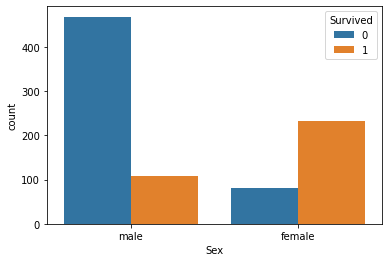

In [ ]:
#Checking the "Sex" feature and the corresponding Survival rate
sb.countplot(x="Sex",data=df_train,hue="Survived")

### What conclusions can we draw from this?

- "Sex" is one of the main predictors/one of the most helpful
- 
- Higher fare, better survivial
- Age factor/"Age" is not a strong predictor/might be
- Male with class 3 cabin survival rate was less as compared to female
- Pclass as a good indicator
- "Age" and Pclass might be correlated

Story:
- Looking at the dataset we can clearly see that female and children were prioritised for the lifeboats
- People in the higher classes had a better chance of survival 
- Pclass=3 might have survived better than people from Pclass 2

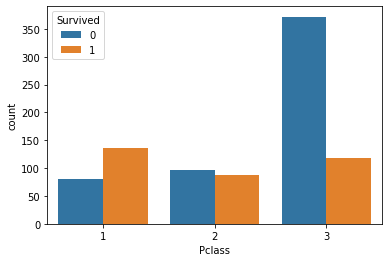

In [ ]:
#Checking the "Pclass" feature and the corresponding Survival rate
sb.countplot(x="Pclass",data=df_train,hue="Survived")

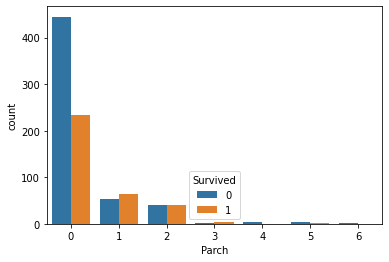

In [ ]:
#Checking the "Siblings" feature and the corresponding Survival rate
sb.countplot(x="Parch",data=df_train,hue="Survived")

In [ ]:
# This code is used to check for the survival numbers per Title in a given name: This is the longer version
survived_or_not = []
for num,i in df_train.iterrows():
  if "Dr." in i["Name"]:
    survived_or_not.append(i["Survived"])

In [2]:
# Counter is a function provided in the collections module imported at the beginning that allows you to create a dictionary of counts from a given list. 
Counter(survived_or_not)

In [ ]:
# This is the pandas way of performing the same task as described above.
df_train.Name.str.contains("DR.").value_counts()

False    762
True     129
Name: Name, dtype: int64

In [ ]:
# A function provided by pandas to create the one-hot encoding for a given categorical variable
pd.get_dummies(df_train['Titles'])

,Capt.,Col.,Countess.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
887,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#But what is Pclass?
df_train.groupby(by = "Pclass")['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

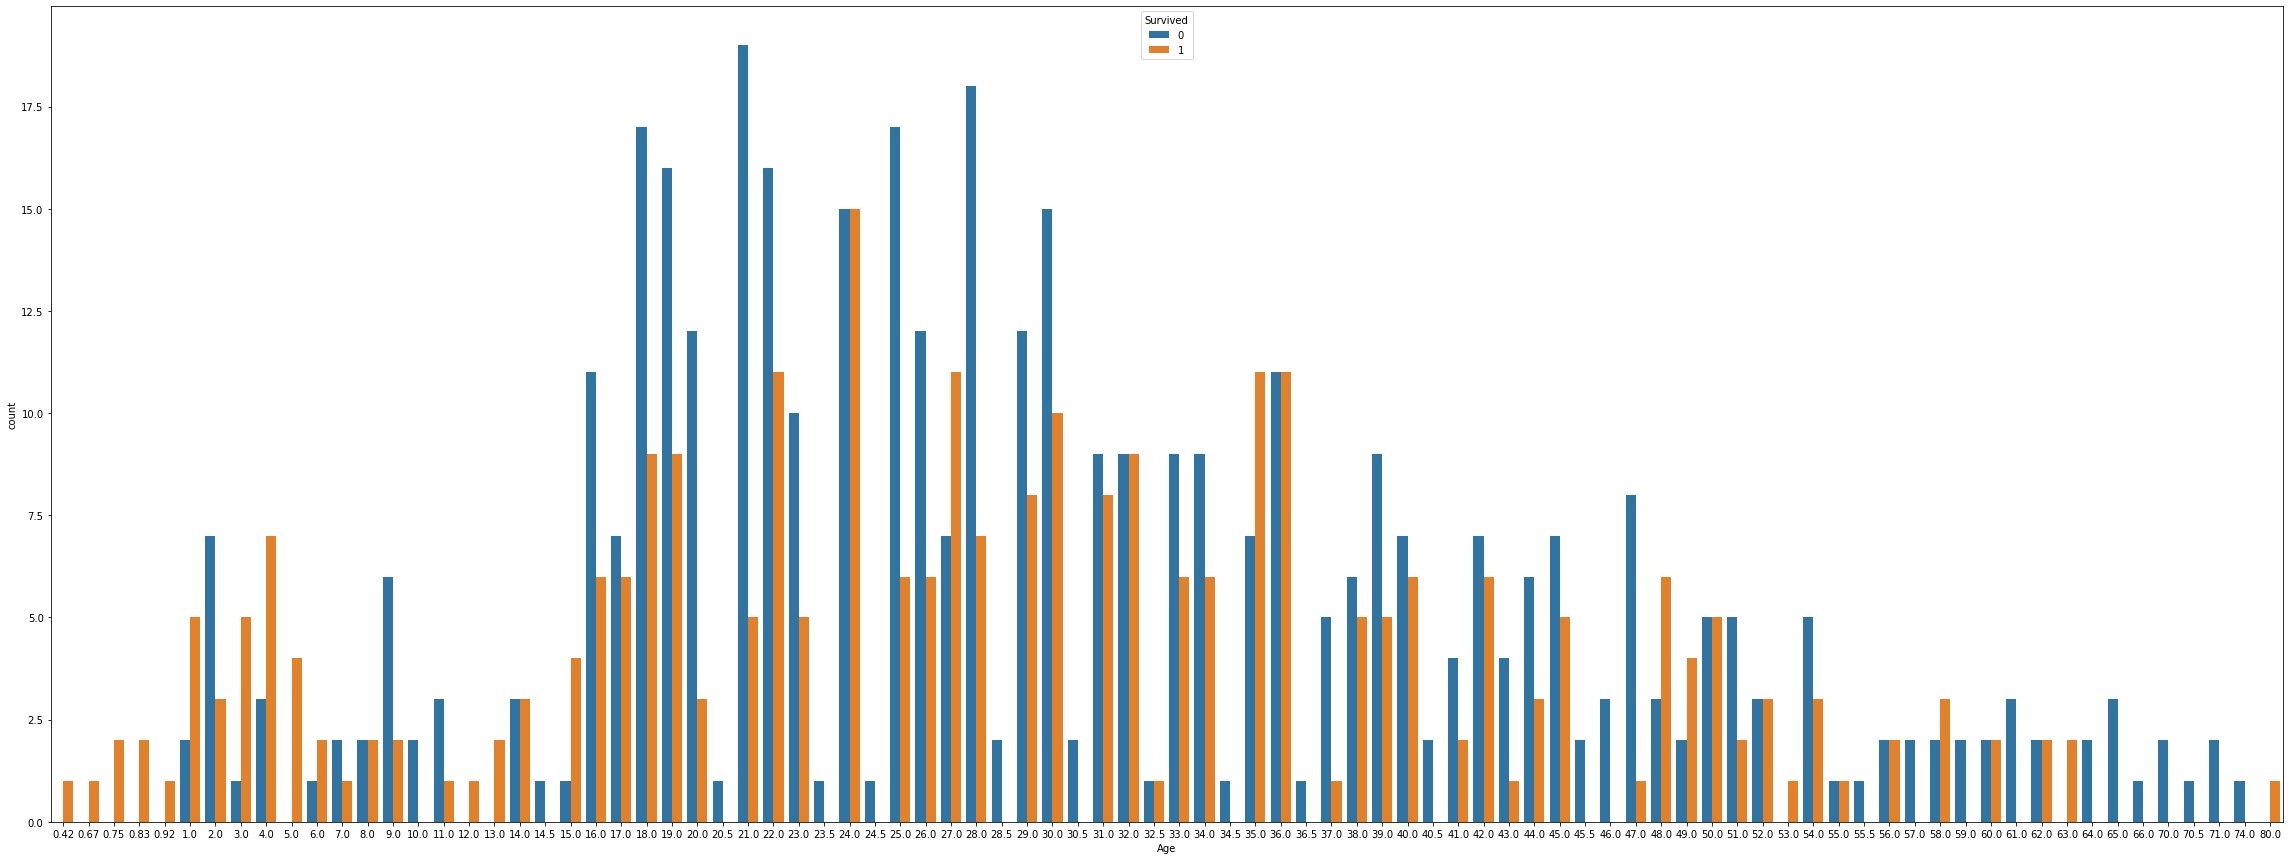

In [ ]:
#Checking the "Age" feature and the corresponding Survival rate
plt.figure(figsize=(40,15))
sb.countplot(x="Age",data=df_train,hue="Survived")
# sb.lineplot(y="Age",data=df_train,hue="Survived")

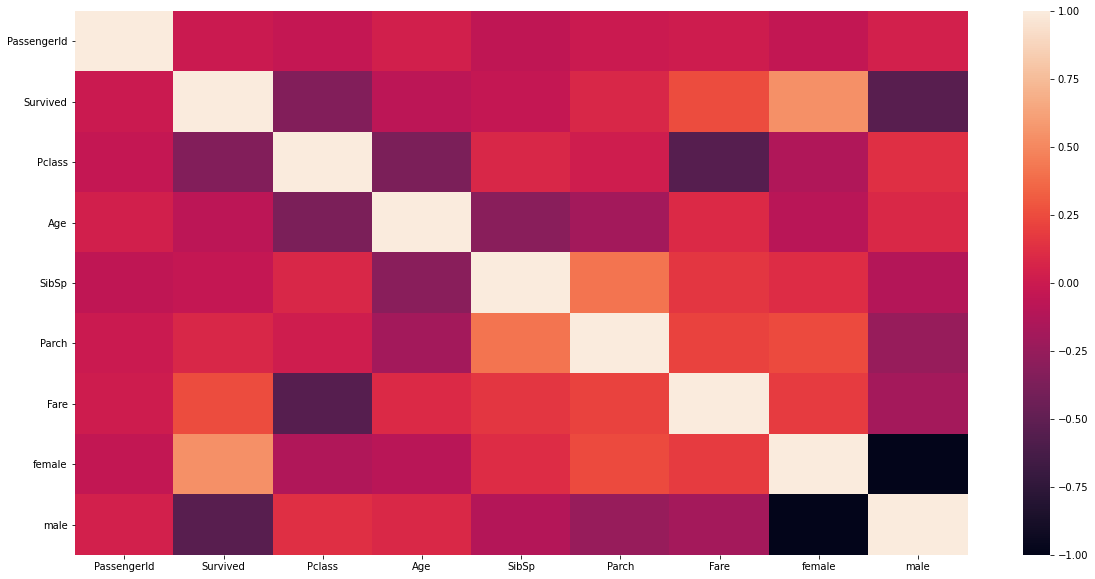

In [ ]:
plt.figure(figsize=(20,10))
sb.heatmap(df_train.corr())

### Create your new features

In [ ]:
df_train[['female','male']] = pd.get_dummies(df_train['Sex'])

In [ ]:
df_train[["C","Q","S"]] = pd.get_dummies(df_train['Embarked'])

In [ ]:
#Drop the irrelevant features
# drop_features = ['PassengerId','Titles','Ticket','Name','Cabin',"Embarked"]
# df_train.drop(drop_features,inplace=True,axis=0)
df_train.drop('Sex',axis=1,inplace=True)

In [ ]:
df_train.loc[:,'Pclass':]

,Pclass,Age,SibSp,Parch,Fare,female,male,S,C,Q
0,3,22.0,1,0,7.2500,0,1,1,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,26.0,0,0,7.9250,1,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,3,35.0,0,0,8.0500,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,1,0,0
887,1,19.0,0,0,30.0000,1,0,1,0,0
888,3,NaN,1,2,23.4500,1,0,1,0,0
889,1,26.0,0,0,30.0000,0,1,0,1,0


## Dealing with missing values


In [ ]:
df_train.fillna(method="backfill",inplace=True)

In [ ]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_train.loc[:,'Pclass':],df_train.Survived,\
                                                          test_size=0.2) # Splitting the data into train and test

In [ ]:
titanic_model_v1 = LogisticRegression()#Creating and training your model
titanic_model_v1.fit(x_train_2,y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predictions = titanic_model_v1.predict(x_test_2)#predictions stored in y_predictions

In [ ]:
print(classification_report(y_test_2,y_predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       100
           1       0.88      0.75      0.81        79

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.84      0.84       179



In [ ]:
df_test = pd.read_csv("./test.csv")

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Need to perform all the above feature engineering steps as done for the training dataset.
# VERY IMPORTANT: THE TEST DATASET SHOULD LOOK EXACTLY LIKE THE TRAINING DATASET
df_test[['female','male']] = pd.get_dummies(df_test['Sex'])
df_test[["C","Q","S"]] = pd.get_dummies(df_test["Embarked"])
df_test.fillna(method="ffill",inplace=True)
drop_features = ["Sex",'Ticket','Name','Cabin',"Embarked"]
df_test.drop(drop_features,inplace=True,axis=1)

In [ ]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

In [ ]:
predictions_for_submission = titanic_model_v1.predict(df_test.loc[:,"Pclass":])

In [ ]:
df_submission = df_test[['PassengerId']].copy()

In [ ]:
df_submission['Survived'] = predictions_for_submission

In [ ]:
df_submission.to_csv("submission_v1.csv")#Save your file as per the gender_submission.csv file provided in Kaggle

## Advanced Feature Engineering Techniques

- Here we will discover techniques such as PCA, RFE and SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
selectkbest_algo = SelectKBest(chi2, k=5)# An advanced feature engineering algorithm to select best features
selectkbest_algo.fit_transform(x_train_2, y_train_2)
#Forward feture selection
#Backward 

array([[ 2.    , 10.5   ,  1.    ,  0.    ,  0.    ],
       [ 3.    ,  7.775 ,  1.    ,  0.    ,  0.    ],
       [ 1.    , 57.9792,  1.    ,  0.    ,  1.    ],
       ...,
       [ 3.    ,  7.8542,  0.    ,  1.    ,  0.    ],
       [ 1.    , 49.5042,  0.    ,  1.    ,  1.    ],
       [ 3.    , 14.4583,  1.    ,  0.    ,  1.    ]])

In [ ]:
selectkbest_algo.get_support()#Function used to determine which columns have been selected. True indicates that particular column number has been selected

array([ True, False, False, False,  True,  True,  True, False,  True,
       False])